In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('messages.csv')
data.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [4]:
data.shape

(2893, 3)

In [5]:
data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

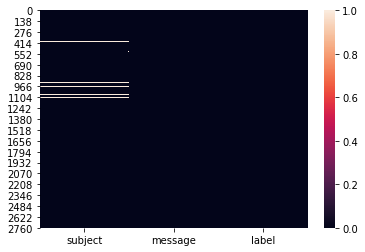

In [6]:
sns.heatmap(data.isnull())

In [7]:
# filling null values in dataset
data['subject'].fillna(data['subject'].mode()[0], inplace=True)

In [8]:
data['description']=data['subject']+data['message']

In [9]:
data.head()

,subject,message,label,description
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [10]:
data.drop(['subject','message'],axis=1,inplace=True)

In [11]:
data.head()

,label,description
0,0,job posting - apple-iss research centercontent...
1,0,"sociolinguisticslang classification grimes , j..."
2,0,query : letter frequencies for text identifica...
3,0,riska colleague and i are researching the diff...
4,0,request book informationearlier this morning i...


In [12]:
print('ham and spam counts','\n',data['label'].value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


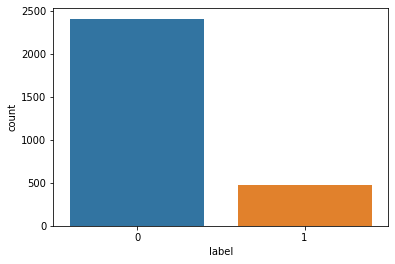

In [13]:
sns.countplot(data['label'])

In [14]:
#New column for Length of message
# length before preprocessing
data['length'] = data['description'].str.len()
data.head(2)

,label,description,length
0,0,job posting - apple-iss research centercontent...,2895
1,0,"sociolinguisticslang classification grimes , j...",1816


In [15]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

# Data cleaning

In [16]:
# Convert all messages to lower case
data['description'] = data['description'].str.lower()

# Replace email addresses with 'email'
data['description'] = data['description'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['description'] = data['description'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['description'] = data['description'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['description'] = data['description'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['description'] = data['description'].str.replace(r'\d+(\.\d+)?', 'numbr')


data['description'] = data['description'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['description'] = data['description'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['description'] = data['description'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))


In [17]:
data['description']

0       job posting apple-iss research centercontent l...
1       sociolinguisticslang classification grime jose...
2       query letter frequency text identificationi po...
3       riska colleague researching differing degree r...
4       request book informationearlier morning phone ...
                              ...                        
2888    love profile ysuolvpvhello thanks stopping tak...
2889    asked join kiddinthe list owner kiddin invited...
2890    anglicization composer namesjudging return pos...
2891    numbr numbr comparative method n ary compariso...
2892    american english australiahello working thesis...
Name: description, Length: 2893, dtype: object

In [18]:
# New column (clean_length) after puncuations,stopwords removal
data['clean_length'] = data.description.str.len()
data.head()

,label,description,length,clean_length
0,0,job posting apple-iss research centercontent l...,2895,2063
1,0,sociolinguisticslang classification grime jose...,1816,1448
2,0,query letter frequency text identificationi po...,1485,1090
3,0,riska colleague researching differing degree r...,328,215
4,0,request book informationearlier morning phone ...,1070,652


In [19]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 9437398
Clean Length 6609146


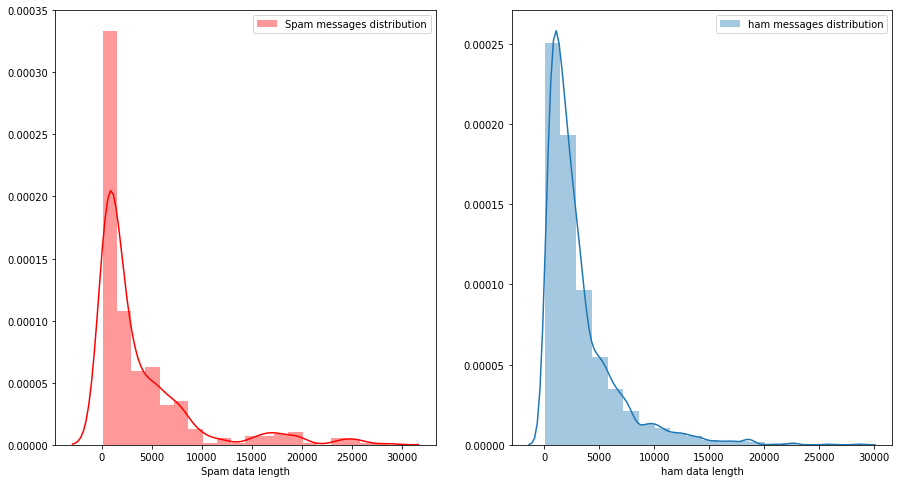

In [20]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam data length')
ax[0].legend()

sns.distplot(data[data['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data length')
ax[1].legend()

plt.show()

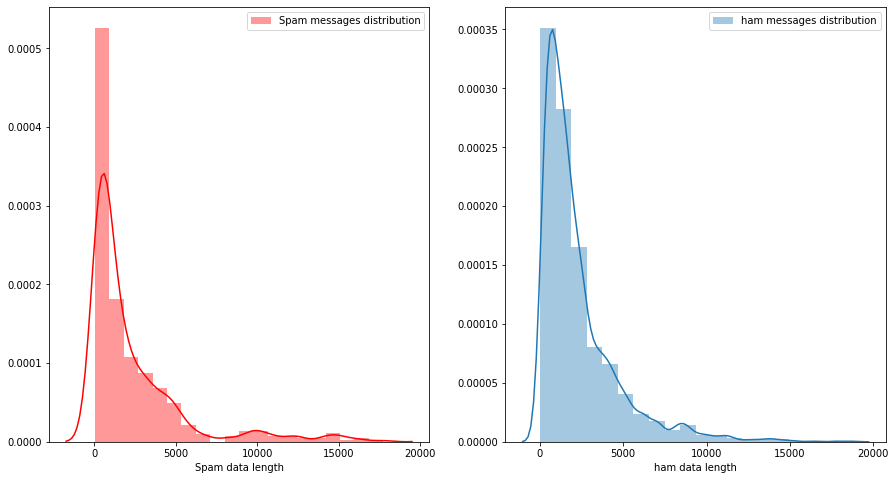

In [21]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam data length')
ax[0].legend()

sns.distplot(data[data['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham data length')
ax[1].legend()

plt.show()

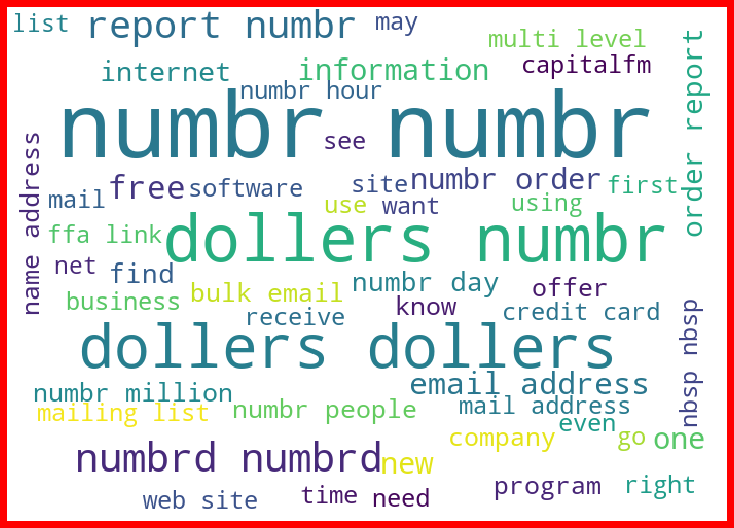

In [22]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = data['description'][data['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

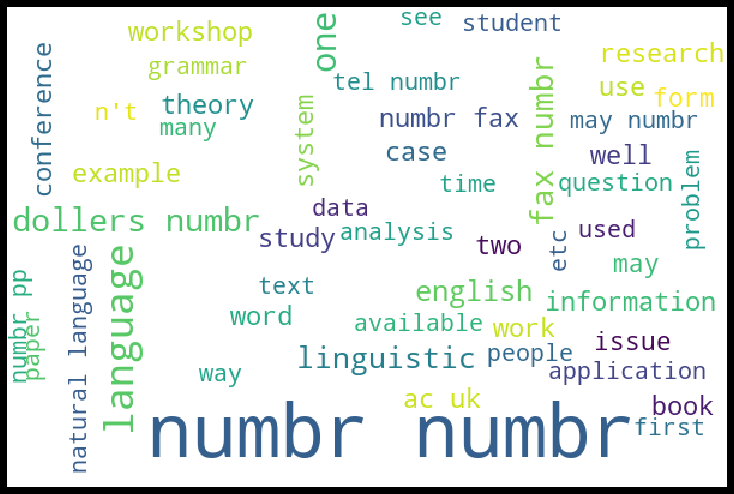

In [23]:
#Getting sense of loud words in ham 

hams = data['description'][data['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
# 1. Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(data['description'])
x = features
y = data['label']

In [25]:


# 3. Split feature and label

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
## importing feature , other models 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

# model building

In [26]:
    ## tuning the parammeters
    rfr=RandomForestClassifier()
    knn=KNeighborsClassifier(n_neighbors=10)
    svc=SVC(kernel='rbf')
    ada=AdaBoostClassifier()
    gbr=GradientBoostingClassifier()
    dtr=DecisionTreeClassifier()
    lr=LogisticRegression()
    naive = MultinomialNB()

    models = []
    models.append(('randomforestREG', rfr))
    models.append(('kneighborsREG', knn))
    models.append(('svc', svc))
    models.append(('ada boost REG', ada))
    models.append(('gradient boosting REG', gbr))
    models.append(('decisiontree REG', dtr))
    models.append(('logistic REG', lr))
    models.append(('multinomial nb', naive))

******** randomforestREG *******


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


acc_score= 0.9620034542314335


F1_score= 0.8952380952380952


cross_val_sc= 0.9536796288118561


roc_auc_sc= 0.9076180659670166


classification_repo
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       464
           1       0.99      0.82      0.90       115

    accuracy                           0.96       579
   macro avg       0.97      0.91      0.94       579
weighted avg       0.96      0.96      0.96      

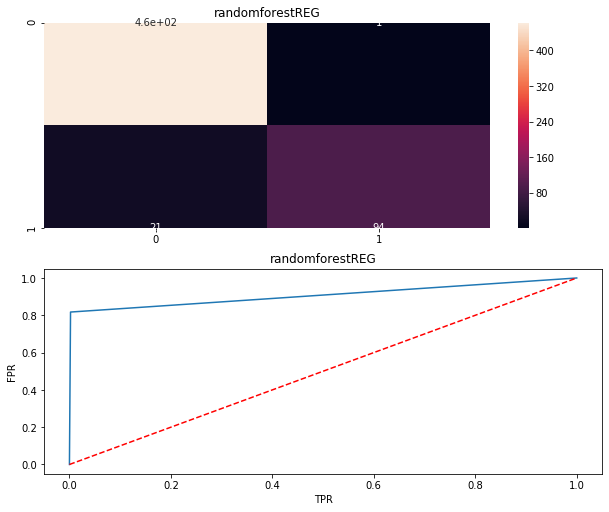

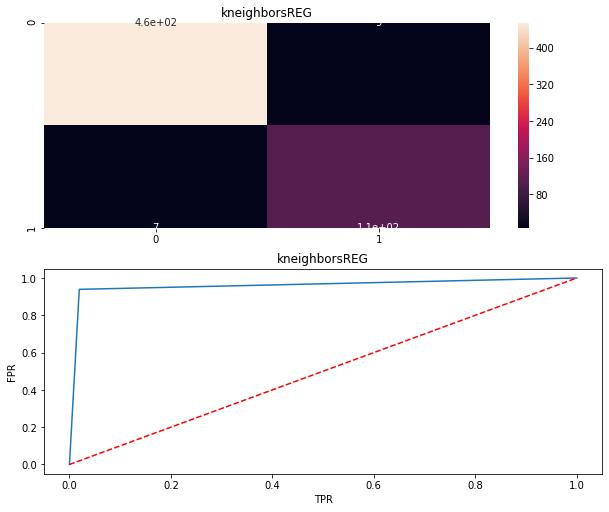

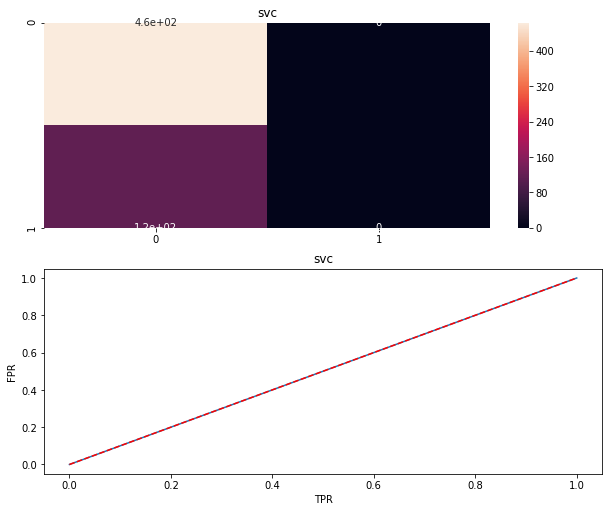

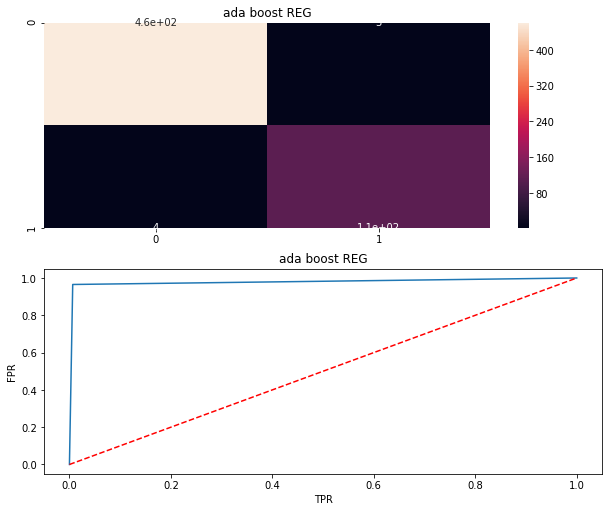

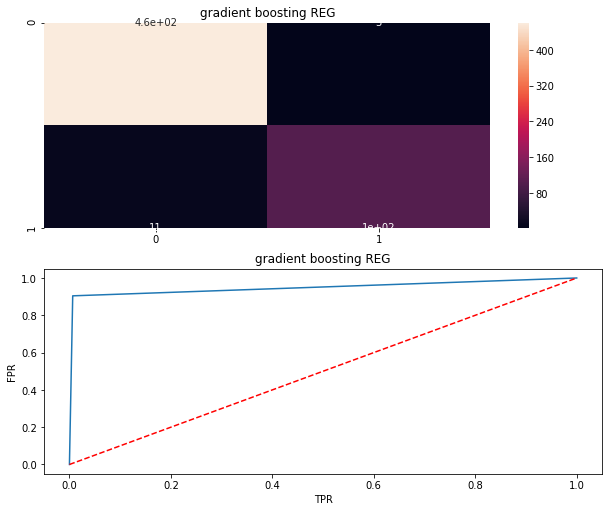

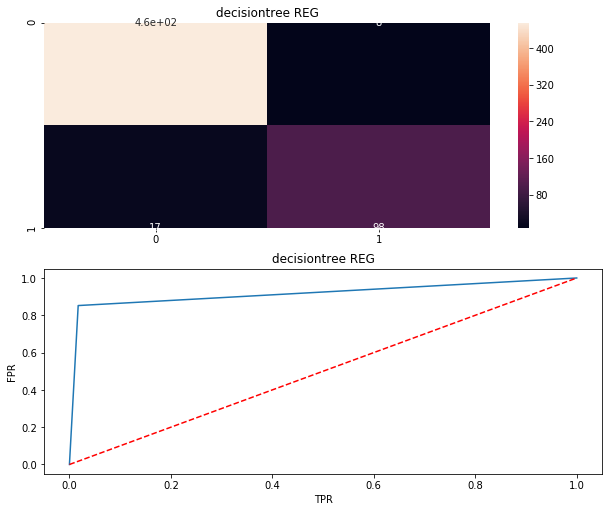

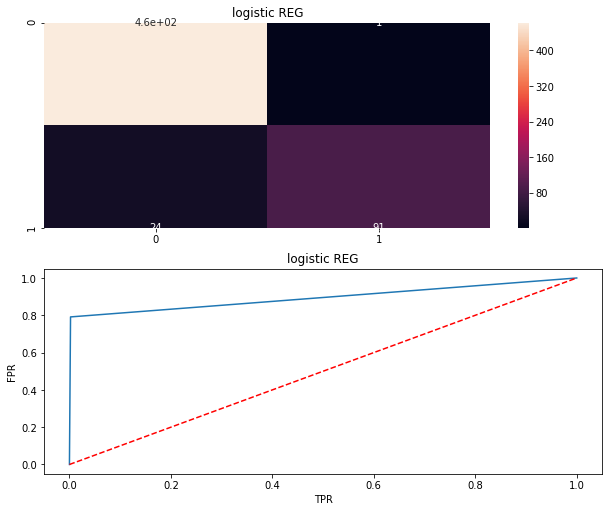

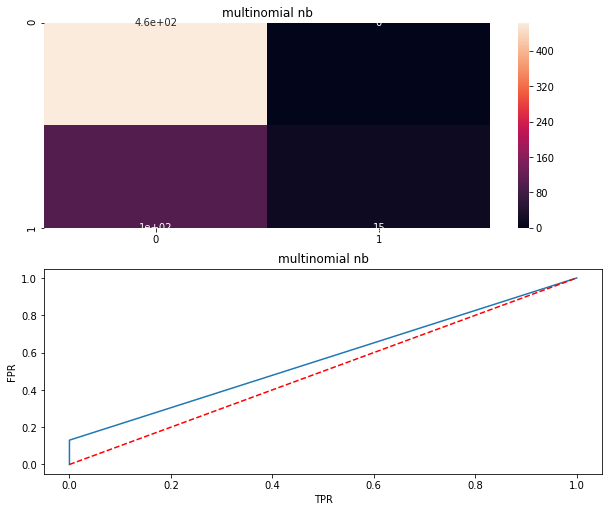

In [27]:
Model=[]
score=[]
cvs=[]
rocscore=[]
F1=[]
for name,model in models:
    print('********',name,'*******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("acc_score=",AS)
    score.append(AS*100)
    print('\n')
    f1=f1_score(pre,y_test)
    print("F1_score=",f1)
    F1.append(f1*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_sc=',sc)
    cvs.append(sc*100)
    print('\n')
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print("roc_auc_sc=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_repo\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    print('\n\n')

In [28]:
result=pd.DataFrame({'model':Model,'Accu_score':score,'cross_val_Score':cvs,'roc-score':rocscore})
result


,model,Accu_score,cross_val_Score,roc-score
0,randomforestREG,96.200345,95.367963,90.761807
1,kneighborsREG,97.236615,95.886996,95.986694
2,svc,80.138169,83.373782,50.000000
3,ada boost REG,98.791019,98.513421,97.937594
4,gradient boosting REG,97.582038,97.234929,94.894115
5,decisiontree REG,95.682211,94.780681,91.746627
6,logistic REG,95.682211,95.919812,89.457459
7,multinomial nb,82.728843,86.001633,56.521739


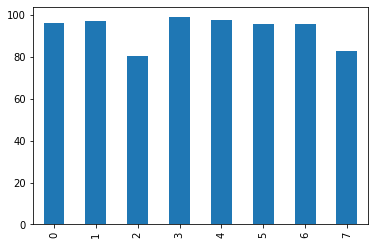

In [41]:
result['Accu_score'].plot.bar()

# Prediction

In [43]:
# ada boost is giving best accuracy score
# also no over / under fitting is present in ada boost technique
# prediction over it 
pred_ada = ada.predict(x)
pred_ada

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

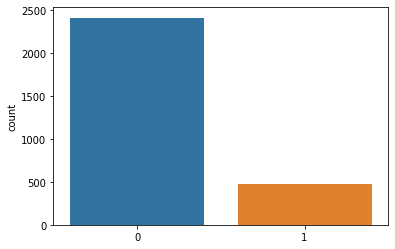

In [44]:
sns.countplot(pred_ada)